# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Прочитаем датасет. Проверим данные на полноту и релевантность. Для пропущенных значений выберем способы заполнения и, по возможности, исключим экстремальные, выбивающиеся значения, для того, чтобы изучить картину именно по средним, наиболее часто встречающимся случаям.<br>
Рассмотрим влияние разных факторов на полную цену и цену за кв.м. и постараемся ответить на вопрос какие факторы и в какой степени оказывают влияние.<br>
Посмотрим отличается ли действие этих факторов в рамках всего дата сета от их действия в рамках центрального района г. Санкт-Перербурка.

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [264]:
import pandas as pd
import matplotlib.pyplot as plt

In [265]:
realty_origin = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
realty_origin.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [266]:
realty_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [267]:
realty_origin.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [268]:
realty_origin.duplicated().sum()

0

In [269]:
len(realty_origin)

23699

### Вывод
'first_day_exposition' необходимо преобразовать в тип datetime, чтобы в дальнейшем с ним можно было производить операции как с датой.<br>
Есть несколько колонок с пропущенными значениями, которые необходимо обработать: 
- 'locality_name' - записи с отсутствующим населенным пунктом, необходимо проверить насколько много таких записей.
- 'balcony' - скорее всего, если количество балковнов не указано, то балкон отсутствует. 
- 'is_apartment' - скорее всего, если значение не указано, то оно False.

### Шаг 2. Предобработка данных

In [270]:
realty = realty_origin.copy()

Приведение поля first_day_exposition к типу datetime.

In [271]:
realty['first_day_exposition'] = pd.to_datetime(realty['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Доля записей с отсутствующим населенным пунктом не больше 0,2%. Заполнить эту колонку по какому-то правилу не получится, а для определения стоимости недвижимости он является существенным фактором, т.к. доля таких записей невелика, их исключение не должно существенно повлиять на результаты.

In [272]:
len(realty[realty['locality_name'].isna()])/len(realty_origin)*100

0.20675977889362418

In [273]:
realty = realty.dropna(subset=['locality_name'])

В колонке 'balcony' пропущенные значения скорее всего это означает, что балкон отсутствует. 

In [274]:
realty['balcony'] = realty['balcony'].fillna(value=0)

В колонке 'is_apartment' пропущенные значения скорее всего означают False.

In [275]:
realty['is_apartment'] = realty['is_apartment'].fillna(value=False)

В данных присутствуют данные о квартирах без указания количества комнат (около 0,8% от общего количества). Можно предположить, что это струдии. Укажем значение 'studio' = True и заменим количество комнат на 1.

In [276]:
len(realty.query('rooms == 0'))/len(realty_origin)*100

0.8312587028988565

In [277]:
def set_studio(row):
    if row['rooms'] == 0:
        return True
        
realty['studio'] = realty.apply(set_studio, axis=1)

In [278]:
realty.loc[realty.loc[:, 'rooms'] == 0, 'rooms'] = 1

В столбцах 'living_area', 'kitchen_area' есть пропущенные значения. Рассчитаем эти значения как долю жилой площади и кухни от общей площади квартиры. Чтобы найди коэффициент соотношения, посчитаем медианное значение 'total_area', 'living_area', 'kitchen_area' в разрезе количества комнат.

In [279]:
realty[['total_area', 'living_area', 'kitchen_area']].isna().sum()

total_area         0
living_area     1898
kitchen_area    2269
dtype: int64

In [280]:
realty_area = realty.groupby(by='rooms')[['total_area', 'living_area', 'kitchen_area']].median()
realty_area['living_per_total'] = realty_area['living_area']/realty_area['total_area']
realty_area['kitchen_per_total'] = realty_area['kitchen_area']/realty_area['total_area']
realty_area

,total_area,living_area,kitchen_area,living_per_total,kitchen_per_total
rooms,,,,,
1,36.30,17.600,9.01,0.484848,0.248209
2,53.00,30.500,8.80,0.575472,0.166038
3,72.90,45.000,9.50,0.617284,0.130316
4,99.50,63.800,11.05,0.641206,0.111055
5,146.45,91.785,15.10,0.626733,0.103107
6,184.30,123.900,19.50,0.672273,0.105806
7,214.00,145.000,20.00,0.677570,0.093458
8,235.70,161.000,25.00,0.683072,0.106067
9,300.95,179.200,14.30,0.595448,0.047516


In [281]:
def calc_living_area(row, coefficient=realty_area['living_per_total']):
    
    return row['total_area']*coefficient.loc[row['rooms']]

In [282]:
def calc_kitchen_area(row, coefficient=realty_area['kitchen_per_total']):
    
    return row['total_area']*coefficient.loc[row['rooms']]

In [283]:
realty.loc[realty.loc[:, 'living_area'].isna(), 'living_area'] = realty.apply(calc_living_area, axis=1)

In [284]:
realty.loc[realty.loc[:, 'kitchen_area'].isna(), 'kitchen_area'] = realty.apply(calc_kitchen_area, axis=1)

Основная часть цен указана руб. для удобства приведем их к млн. руб.

In [285]:
realty['last_price_mln'] = realty['last_price']/1e6


'floors_total' заполнено не везде. Предположим, что пропущенные значения означают, что это последний этаж в доме.

In [286]:
realty.loc[realty.loc[:, 'floors_total'].isna(), 'floors_total'] = realty.loc[realty.loc[:, 'floors_total'].isna(), 'floor']

In [287]:
realty.loc[realty.loc[:, 'floors_total'].isna(), 'floors_total']

Series([], Name: floors_total, dtype: float64)

Заполним 'ceiling_height' там, где это значение пропущено. Найдем медианную высоту для домов с такой этажностью. Для этажности, где отсутствует медианное значение, укажем обычную высоту 2,5.

In [288]:
realty.loc[realty.loc[:, 'ceiling_height'].isna(), 'ceiling_height'] = realty.groupby('floors_total')['ceiling_height'].transform('median')

In [289]:
ordinary_ceiling_height = 2.5 
realty = realty.fillna(value={'ceiling_height': ordinary_ceiling_height})

In [290]:
realty.loc[realty.loc[:, 'ceiling_height'].isna(), 'ceiling_height']

Series([], Name: ceiling_height, dtype: float64)

In [291]:
realty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null datetime64[ns]
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null float64
living_area             23650 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  197 non-null object
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 23650 non-null float64
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
cityCenters_nearest     18139 non-null float64
parks_around3000        18140 non-null float64
parks_nearest           8064 non-null float64
ponds_ar

----

### Шаг 3. Посчитайте и добавьте в таблицу

- цена квадратного метра

In [292]:
realty['price_metre'] = realty['last_price']/realty['total_area']

- день недели, месяц и год публикации объявления

In [293]:
realty['weekday'] = realty['first_day_exposition'].dt.weekday

In [294]:
realty['month'] = realty['first_day_exposition'].dt.month

In [295]:
realty['year'] = realty['first_day_exposition'].dt.year

- этаж квартиры; варианты — первый, последний, другой

Установим числовые признаки категории этажа, чтобы в дальнейщем получить коэффициент корреляции. Для того, чтобы можно было заменить коды на значения в DataFram'е создадим словарь значений.

In [296]:
floor_dict = pd.DataFrame([[1, 'Первый'],[2, 'Другой'], [3, 'Последний']], columns=['cod', 'floor_category'])
floor_dict

,cod,floor_category
0,1,Первый
1,2,Другой
2,3,Последний


In [297]:
def set_floor(row):
    if row['floor'] == 1:
        return 1
    elif row['floor'] == row['floors_total']:
        return 3
    else: 
        return 2

In [298]:
realty['floor_catеgory'] = realty.apply(set_floor, axis=1)

- соотношение жилой и общей площади, а также отношение площади кухни к общей

In [299]:
realty['living_per_total'] = realty['living_area']/realty['total_area']

In [300]:
realty['kitchen_per_total'] = realty['kitchen_area']/realty['total_area']

In [301]:
realty.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_nearest,days_exposition,last_price_mln,price_metre,weekday,month,year,floor_catеgory,living_per_total,kitchen_per_total
count,23650.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,...,9085.000000,20470.000000,23650.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000
mean,9.862326,6.541127e+06,60.329069,2.078436,2.735879,10.673784,34.625290,5.893277,10.470194,0.591712,...,518.059879,180.753200,6.541127,9.943225e+04,2.568710,6.401564,2017.370021,2.021142,0.564202,0.187852
std,5.682278,1.089640e+07,35.661808,1.066393,0.995251,6.593455,22.732619,4.883317,5.813876,0.959662,...,277.841733,219.777916,10.896399,5.033794e+04,1.788808,3.491418,1.037806,0.516685,0.102397,0.071343
min,0.000000,1.219000e+04,12.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,13.000000,1.000000,0.012190,1.118349e+02,0.000000,1.000000,2014.000000,1.000000,0.021583,0.025381
25%,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,18.700000,2.000000,7.100000,0.000000,...,293.000000,45.000000,3.400000,7.661497e+04,1.000000,3.000000,2017.000000,2.000000,0.491178,0.133333
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,...,502.000000,95.000000,4.650000,9.500000e+04,3.000000,6.000000,2017.000000,2.000000,0.571429,0.171429
75%,14.000000,6.799000e+06,69.700000,3.000000,2.750000,16.000000,42.300000,8.000000,11.800000,1.000000,...,730.000000,231.000000,6.799000,1.142742e+05,4.000000,10.000000,2018.000000,2.000000,0.632911,0.238095
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,427.546729,33.000000,122.640248,5.000000,...,1344.000000,1580.000000,763.000000,1.907500e+06,6.000000,12.000000,2019.000000,3.000000,1.000000,0.787879


### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

----
- Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

In [302]:
parameters = ['total_area', 'last_price_mln', 'rooms', 'ceiling_height']

In [303]:
def print_graphics(df, column):
    print('График распределения и диаграмма размаха для параметра - ', column)
    df[column].hist(bins=50, figsize=(12, 5))        
    plt.show()
    df.boxplot(column=column, figsize=(5, 12))
    plt.show()

График распределения и диаграмма размаха для параметра -  total_area


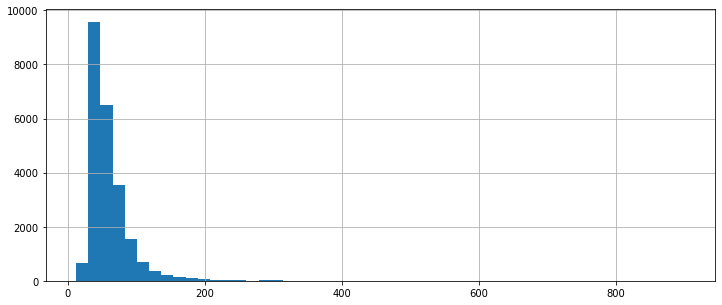

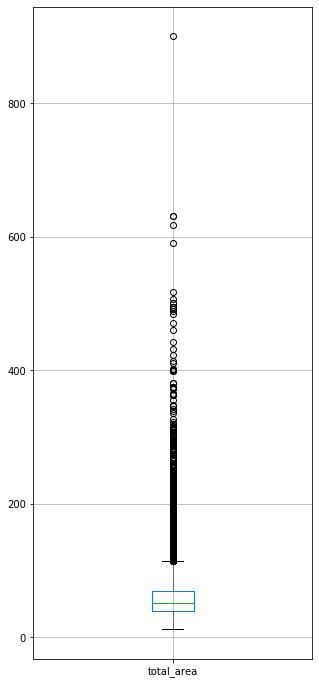

График распределения и диаграмма размаха для параметра -  last_price_mln


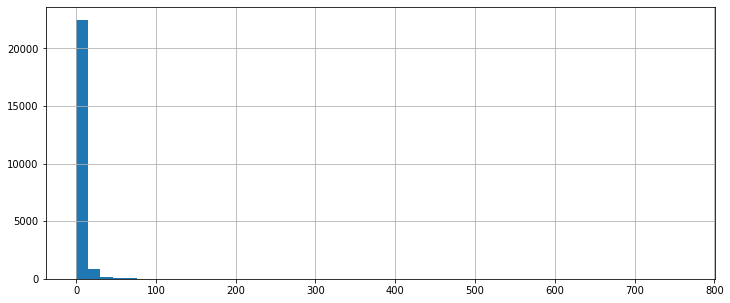

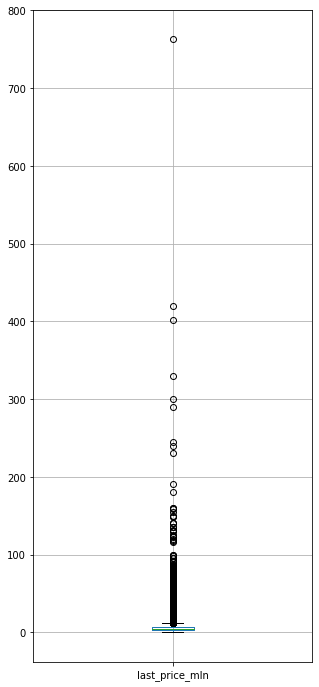

График распределения и диаграмма размаха для параметра -  rooms


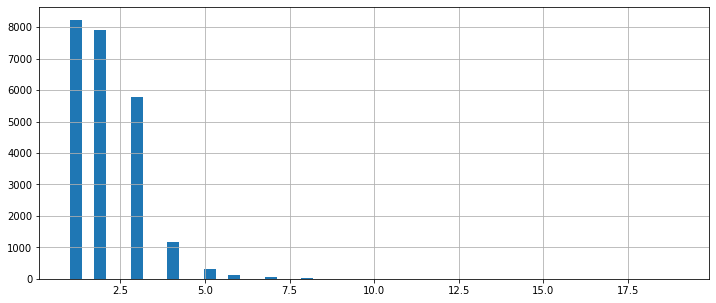

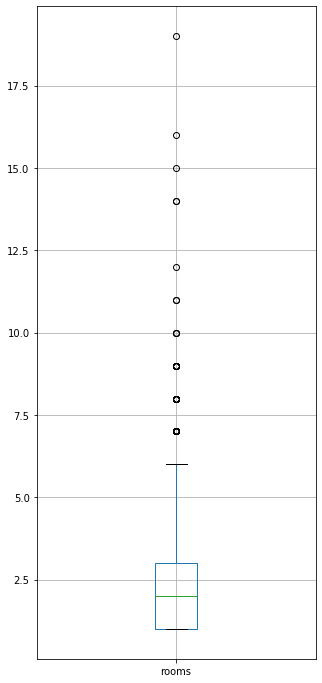

График распределения и диаграмма размаха для параметра -  ceiling_height


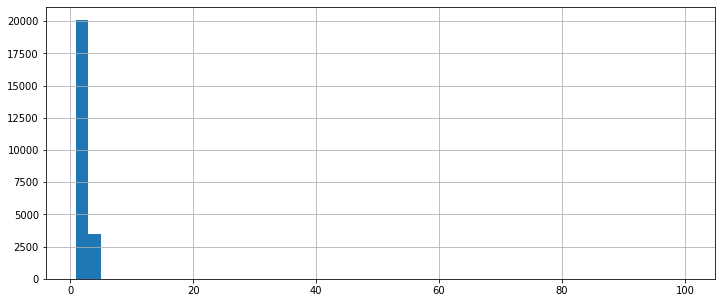

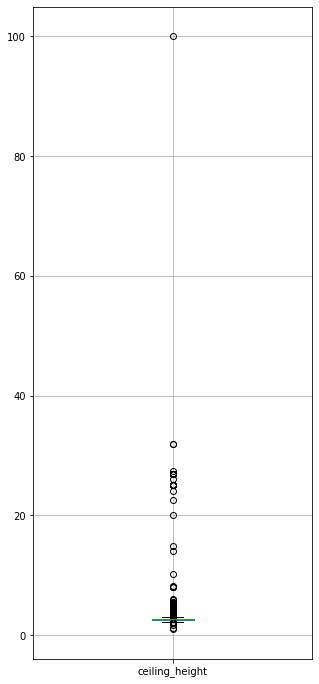

In [304]:
for parametre in parameters:
    print_graphics(realty, parametre)

<b>Параметр total_area</b><br>
Наибольшаяя часть квартир имеет площадь от 30 до 80 кв.м. Квартир площадью менее 25 и более 110 очень мало. График имеет форму распределения Пуассона. Видно отдельные выбросы больше 400 кв.м., уберем эти значения.

In [305]:
realty = realty.query('total_area <= 400')

<b>Параметр last_price_mln</b><br>
Основная часть квартир продается по стоимости до 100 млн. руб. Уберем чрезвычайно редкие значения.

In [306]:
realty = realty.query('last_price_mln <= 100')

<b>Параметр rooms</b><br>
Чаще всего продают 1 и 2-комнатные квартиры, реже 3, 4, 5 - комнатные. Больше 8 комнат квартир почти не продают.

In [307]:
realty = realty.query('rooms < 8')

<b>Параметр ceiling_height</b><br>
На графике видно, что наиболее частые значения это 2.5, 2.7, 3.0. Ранее пропущенные значения мы заполнили медианой. Исключим значения, которые выбиваются ниже 2 и выше 100. 

In [308]:
realty = realty.loc[(realty.loc[:, 'ceiling_height'] > 2) & (realty.loc[:, 'ceiling_height'] < 100)]

----
- Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

75% квартир продается не больше чем за 8 месяцев (~230 дней).<br>
Есть сильно выбивающееся значение, где время продажи составило больше 4 лет.<br> 
2-комнатная квартира с нормальной ценой и несильно выбивающимися другими параметрами находилась в продаже необычно долго. Можно предположить, что это какое-то рекламное объявление, которое размещено на сайте для привлечения клиентов и не является реально продающейся квартирой.

График распределения и диаграмма размаха для параметра -  days_exposition


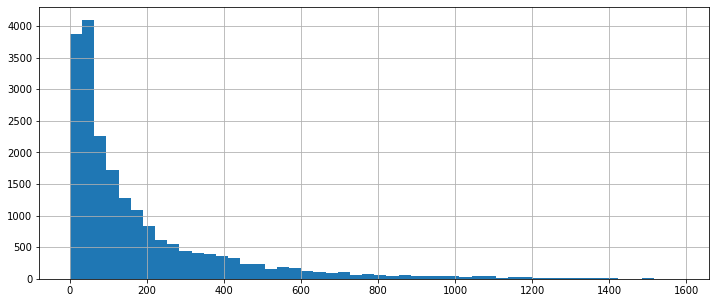

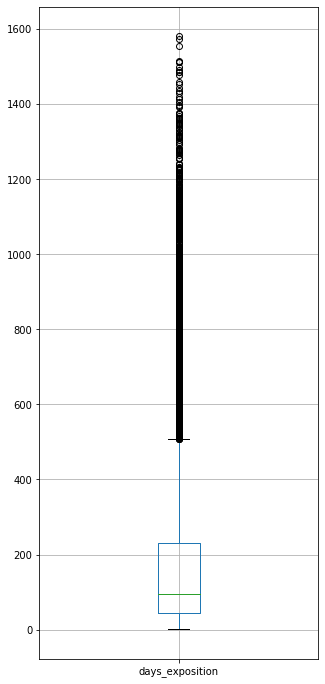

In [309]:
print_graphics(realty, 'days_exposition')

In [310]:
realty['days_exposition'].describe()

count    20395.000000
mean       180.313802
std        219.295095
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [311]:
realty.loc[realty.loc[:, 'days_exposition'] == realty['days_exposition'].max()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,last_price_mln,price_metre,weekday,month,year,floor_catеgory,living_per_total,kitchen_per_total
18843,11,3500000.0,48.2,2014-12-15,2,2.5,5.0,27.4,2,False,...,NaN,1580.0,3.5,72614.107884,0,12,2014,2,0.568465,0.159751


Выделим и рассмотрим "быстрые" (до 230 дней) и "медленные" (больше 230 дней) продажи.<br>
Гистограмма медленных продаж имеет вид распределения Пуассона. <br>
А на гистограмме быстрых продаж имеется несколько экстремальных значений.

In [312]:
long_sells = realty.loc[(realty.loc[:, 'days_exposition'] >= 230) & (realty.loc[:, 'days_exposition'] < realty['days_exposition'].max())]

График распределения и диаграмма размаха для параметра -  days_exposition


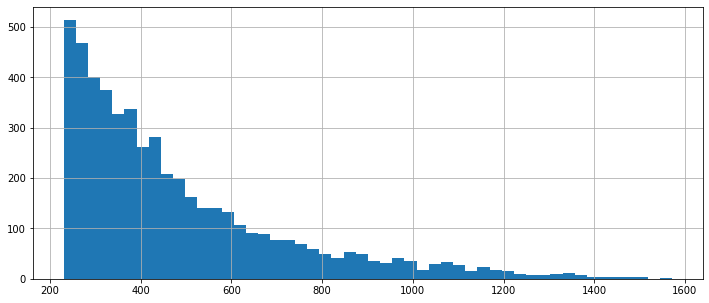

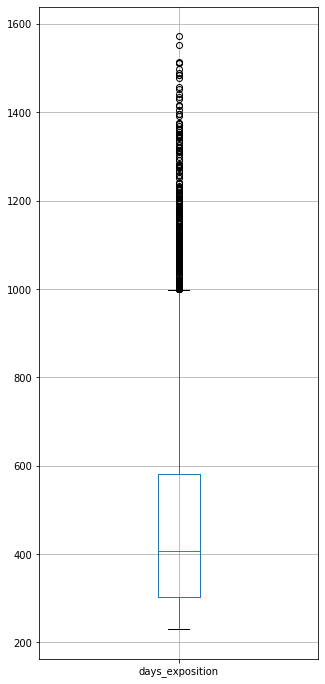

In [313]:
print_graphics(long_sells, 'days_exposition')

In [314]:
quick_sells = realty.loc[realty.loc[:, 'days_exposition'] < 230]

График распределения и диаграмма размаха для параметра -  days_exposition


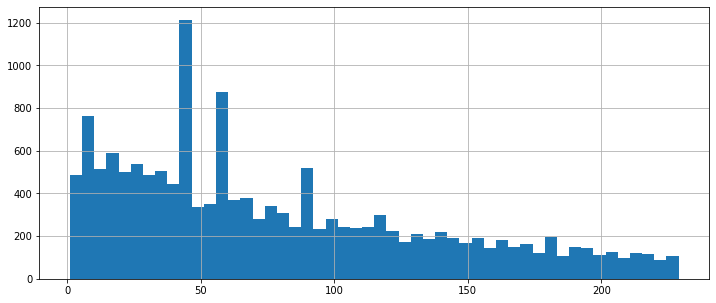

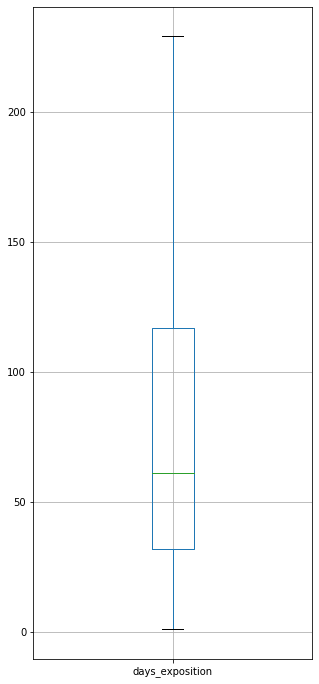

In [315]:
print_graphics(quick_sells, 'days_exposition')

Рассмотрим подробнее экстремальные значения. Видим, что количество дней соответствует значениям 1 нед., 1 мес., 1.5 мес., 2 мес. и 1,5 мес. - похоже, в одной из систем были фиксированные значения для выбора и указать точное количество дней было нельзя.
В целом график

In [316]:
realty['days_exposition'].value_counts()

45.0      877
60.0      538
7.0       233
30.0      208
90.0      202
         ... 
1355.0      1
873.0       1
730.0       1
976.0       1
773.0       1
Name: days_exposition, Length: 1138, dtype: int64

В целом график имеет вид распределения Пуассона.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb30cbf33d0>]],
      dtype=object)

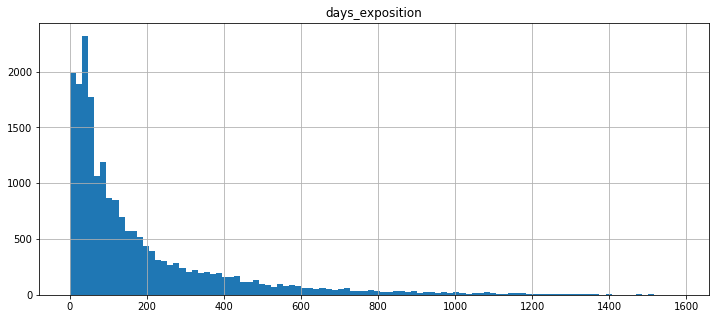

In [317]:
realty.hist(column='days_exposition', bins=100, figsize=(12, 5))

In [318]:
realty.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_nearest,days_exposition,last_price_mln,price_metre,weekday,month,year,floor_catеgory,living_per_total,kitchen_per_total
count,23557.000000,2.355700e+04,23557.000000,23557.000000,23557.000000,23557.000000,23557.000000,23557.000000,23557.000000,23557.000000,...,9027.000000,20395.000000,23557.000000,23557.000000,23557.000000,23557.000000,23557.000000,23557.000000,23557.000000,23557.000000
mean,9.856094,6.196064e+06,59.424175,2.062487,2.730473,10.687481,34.087061,5.896294,10.390264,0.592605,...,519.238950,180.313802,6.196064,98555.047321,2.568366,6.403489,2017.370888,2.020334,0.564095,0.188099
std,5.678330,6.217577e+06,30.990646,1.013662,0.768078,6.595309,20.178229,4.887109,5.510218,0.959735,...,277.797438,219.295095,6.217577,42920.736249,1.788759,3.491845,1.037310,0.516055,0.102266,0.071190
min,0.000000,1.219000e+04,12.000000,1.000000,2.200000,1.000000,2.000000,1.000000,1.300000,0.000000,...,13.000000,1.000000,0.012190,111.834862,0.000000,1.000000,2014.000000,1.000000,0.021583,0.025381
25%,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,18.700000,2.000000,7.037037,0.000000,...,295.000000,45.000000,3.400000,76584.507042,1.000000,3.000000,2017.000000,2.000000,0.491049,0.133333
50%,9.000000,4.600000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,...,503.000000,95.000000,4.600000,94972.067039,3.000000,6.000000,2017.000000,2.000000,0.571429,0.171875
75%,14.000000,6.750000e+06,69.200000,3.000000,2.750000,16.000000,42.100000,8.000000,11.700000,1.000000,...,732.000000,230.000000,6.750000,114111.498258,4.000000,10.000000,2018.000000,2.000000,0.632659,0.238208
max,50.000000,9.900000e+07,400.000000,7.000000,32.000000,60.000000,271.028037,33.000000,107.000000,5.000000,...,1344.000000,1580.000000,99.000000,848484.848485,6.000000,12.000000,2019.000000,3.000000,1.000000,0.787879


----
- Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

Рассмотрим зависимость полной стоимости и цены за квадратный метр от следующих факторов: общая площадь, количество комнат, расстояние от центра, этаж (первый/последний/другой), день недели, месяц, год.<br> 
Для этого рассчитаем коэффициент корреляции Пирсона для сочетания цены с каждым из факторов.<br> 
Из таблицы видно, что полная цена напрямую зависит от общей площади, в то время как цена за метр почти не зависит.<br> Цена за метр почти не зависит от количества комнат, а полная цена, как и стоило ожидать, зависит. <br>
Близость к центру имеет отрицательную корреляцию с ценой квартиры. Чем дальше от центра, тем ниже стоимость кв. м.<br>
Зависимости от дня недели и месяца размщения нет. А вот небольшая зависимость от года размещения есть, причем с годами стоимость кв.м. увеличивается, а полная цена квартиры снижается. Возможно это говорит о появлении большего числа недорого жилья (квартир с небольшой площадью - студий).

In [319]:
factors = ['total_area', 'rooms', 'cityCenters_nearest', 'floor_catеgory', 'weekday', 'month', 'year']

In [320]:
price_type = ['last_price', 'price_metre']

In [321]:
coeff_corr = pd.DataFrame(index=factors)
for price in price_type:
    corr = []
    for factor in factors:
        corr.append(realty[price].corr(realty[factor]))
    coeff_corr.insert(0, column=price, value=corr)
coeff_corr

,price_metre,last_price
total_area,0.255255,0.761808
rooms,0.014652,0.460604
cityCenters_nearest,-0.362011,-0.302731
floor_catеgory,0.045612,0.059050
weekday,-0.009385,-0.004912
month,0.001172,0.009433
year,0.017518,-0.054127


Альтернативный способ построить матрицу корреляции без цикла for

In [322]:
coeff_corr = realty.corr().loc[factors, price_type]
coeff_corr

,last_price,price_metre
total_area,0.761808,0.255255
rooms,0.460604,0.014652
cityCenters_nearest,-0.302731,-0.362011
floor_catеgory,0.059050,0.045612
weekday,-0.004912,-0.009385
month,0.009433,0.001172
year,-0.054127,0.017518


----
- Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.

Проверим, что в наименованиях населенных пунктов нет таких, которые различаются регистром написания. <br>
Найдем 10 населенных пунктов с наибольшим числом объявлений и рассчитаем средную цену за кв.м.<br>

In [323]:
len(realty['locality_name'].unique()) == len(realty['locality_name'].str.lower().unique())

True

In [324]:
top10_locality = realty['locality_name'].value_counts().head(10)
top10_locality

Санкт-Петербург      15639
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             397
Пушкин                 369
Колпино                337
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 235
Name: locality_name, dtype: int64

In [325]:
metre_price = realty.pivot_table(index='locality_name', values='price_metre', aggfunc=['count', 'mean'])
metre_price.columns = ['advert', 'mean_price']
metre_price = metre_price.sort_values(by='advert', ascending=False).head(10).sort_values(by='mean_price', ascending=False)
metre_price

,advert,mean_price
locality_name,,
Санкт-Петербург,15639,113580.255340
Пушкин,369,103125.819291
деревня Кудрово,299,92473.547576
посёлок Парголово,327,90175.913458
посёлок Мурино,522,85752.189195
посёлок Шушары,440,78677.364217
Колпино,337,75333.295801
Гатчина,307,68746.146763
Всеволожск,397,68719.320400


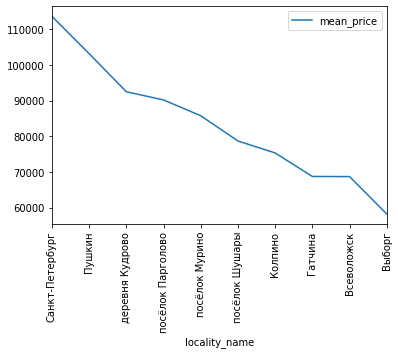

In [326]:
metre_price.plot(y='mean_price', rot=90)

----
- Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.

Выберем недвижимость в Санкт-Петербурке и построим график, показывающий зависимость стоимости кв.м. от расстояния до центра. Округлим расстояние до 1 км.<br>
На графике видно, что самая догорая недвижимость находится в непосредственном центре города, после 9 км. цена постепенно снижается. Таким образом можно выделить центральный район радиус которого составляет ~9-10 км.<br>
Есть пик на отметке 27 км. Вероятнее всего это уже недвижимость в г. Пкушкино, который находится в 27 км. от Санкт-Петербурга. Возможно, здесь не вполне корректно было указано расстояние до центра, т.к. подразумевалось расстояние до центра ближайшего города.

In [327]:
realty_spb = realty.query('locality_name == "Санкт-Петербург"').copy()

In [328]:
realty_spb.loc[:, 'cityCenters_nearest_km'] = realty_spb.loc[:, 'cityCenters_nearest'].round(decimals=-3)/1e3

In [329]:
realty_spb_pt = realty_spb.pivot_table(index='cityCenters_nearest_km', values='price_metre')

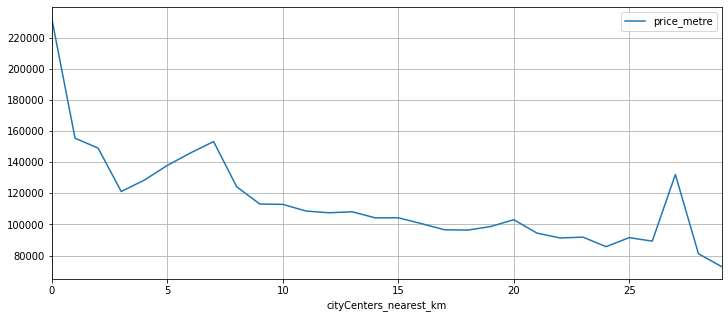

In [330]:
realty_spb_pt.plot(y='price_metre', kind='line', figsize=(12, 5), grid=True)

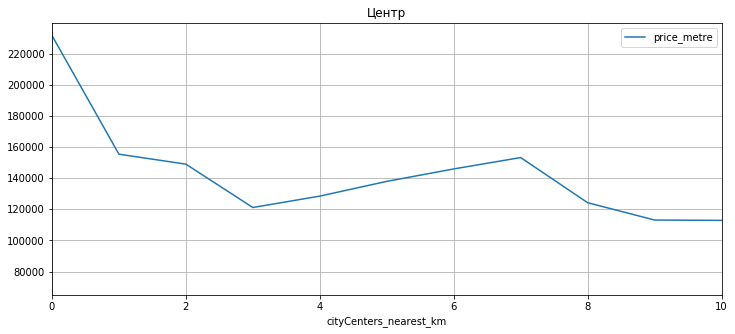

In [331]:
realty_spb_pt.plot(y='price_metre', kind='line', figsize=(12, 5), grid=True, xlim=(0, 10), title='Центр')

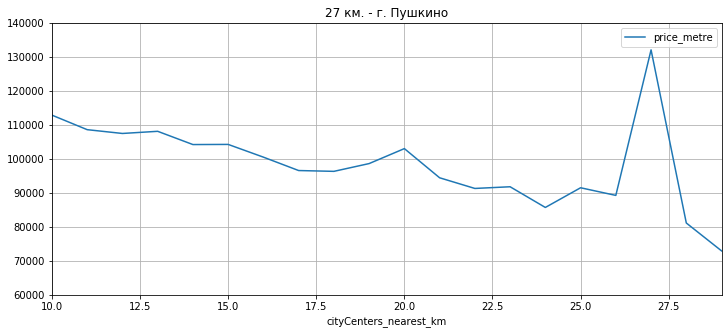

In [332]:
realty_spb_pt.plot(y='price_metre', kind='line', figsize=(12, 5), grid=True, xlim=(10, 29), ylim=(60e3, 140e3), title='27 км. - г. Пушкино')

----
- Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

In [333]:
realty_cntr = realty_spb.query('cityCenters_nearest_km < 10')
realty_cntr = realty_cntr.reset_index(drop=True)
realty_cntr.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,last_price_mln,price_metre,weekday,month,year,floor_catеgory,living_per_total,kitchen_per_total,cityCenters_nearest_km
0,0,64900000.0,159.0,2015-07-24,3,2.60,14.0,98.148148,9,False,...,424.0,64.9,408176.100629,4,7,2015,2,0.617284,0.130316,7.0
1,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,121.0,10.0,100000.000000,1,6,2018,2,0.320000,0.410000,8.0
2,8,6500000.0,97.2,2015-10-31,2,2.80,3.0,46.500000,1,False,...,265.0,6.5,66872.427984,5,10,2015,1,0.478395,0.201646,2.0
3,6,15500000.0,149.0,2017-06-26,5,2.55,5.0,104.000000,4,False,...,644.0,15.5,104026.845638,0,6,2017,2,0.697987,0.114094,4.0
4,7,45000000.0,161.0,2017-10-17,3,3.20,8.0,38.000000,4,False,...,541.0,45.0,279503.105590,1,10,2017,2,0.236025,0.310559,7.0


In [334]:
realty_cntr.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,days_exposition,last_price_mln,price_metre,weekday,month,year,floor_catеgory,living_per_total,kitchen_per_total,cityCenters_nearest_km
count,4646.000000,4.646000e+03,4646.000000,4646.000000,4646.000000,4646.000000,4646.000000,4646.000000,4646.000000,4646.000000,...,3917.000000,4646.000000,4646.000000,4646.000000,4646.00000,4646.000000,4646.000000,4646.000000,4646.000000,4646.000000
mean,9.981489,1.168365e+07,82.890973,2.616444,2.939092,8.030994,48.807561,4.620534,13.339262,0.371287,...,230.958131,11.683653,134760.457661,2.520448,6.40960,2017.222772,2.061343,0.578021,0.175845,5.526259
std,5.956108,1.087847e+07,45.666398,1.236902,0.788104,4.832647,30.446286,3.496207,8.125118,0.810657,...,264.985165,10.878473,62518.856476,1.742618,3.45687,1.116510,0.517408,0.109728,0.079743,2.280931
min,0.000000,1.219000e+04,12.000000,1.000000,2.400000,2.000000,2.000000,1.000000,2.000000,0.000000,...,2.000000,0.012190,111.834862,0.000000,1.00000,2014.000000,1.000000,0.021583,0.025381,0.000000
25%,5.000000,5.950000e+06,51.000000,2.000000,2.685000,5.000000,28.780189,2.000000,8.500000,0.000000,...,55.000000,5.950000,98953.341231,1.000000,3.00000,2017.000000,2.000000,0.511206,0.120860,4.000000
50%,9.000000,8.400000e+06,72.000000,3.000000,2.900000,6.000000,42.000000,4.000000,11.000000,0.000000,...,123.000000,8.400000,120000.000000,3.000000,6.00000,2017.000000,2.000000,0.590318,0.154756,5.000000
75%,14.000000,1.290000e+07,100.000000,3.000000,3.050000,10.000000,60.000000,5.000000,15.300000,0.000000,...,314.000000,12.900000,148924.349882,4.000000,10.00000,2018.000000,2.000000,0.653061,0.212987,8.000000
max,50.000000,9.900000e+07,400.000000,7.000000,32.000000,28.000000,271.028037,25.000000,107.000000,5.000000,...,1572.000000,99.000000,848484.848485,6.000000,12.00000,2019.000000,3.000000,0.983447,0.636986,9.000000


На графиках видно, что с ростом площади квартиры цена квартиры постепенно увеличивается. Большая часть фонда квартир в центре - это 2, 3-комнатные квартиры.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb30cc8cfd0>,
      dtype=object)

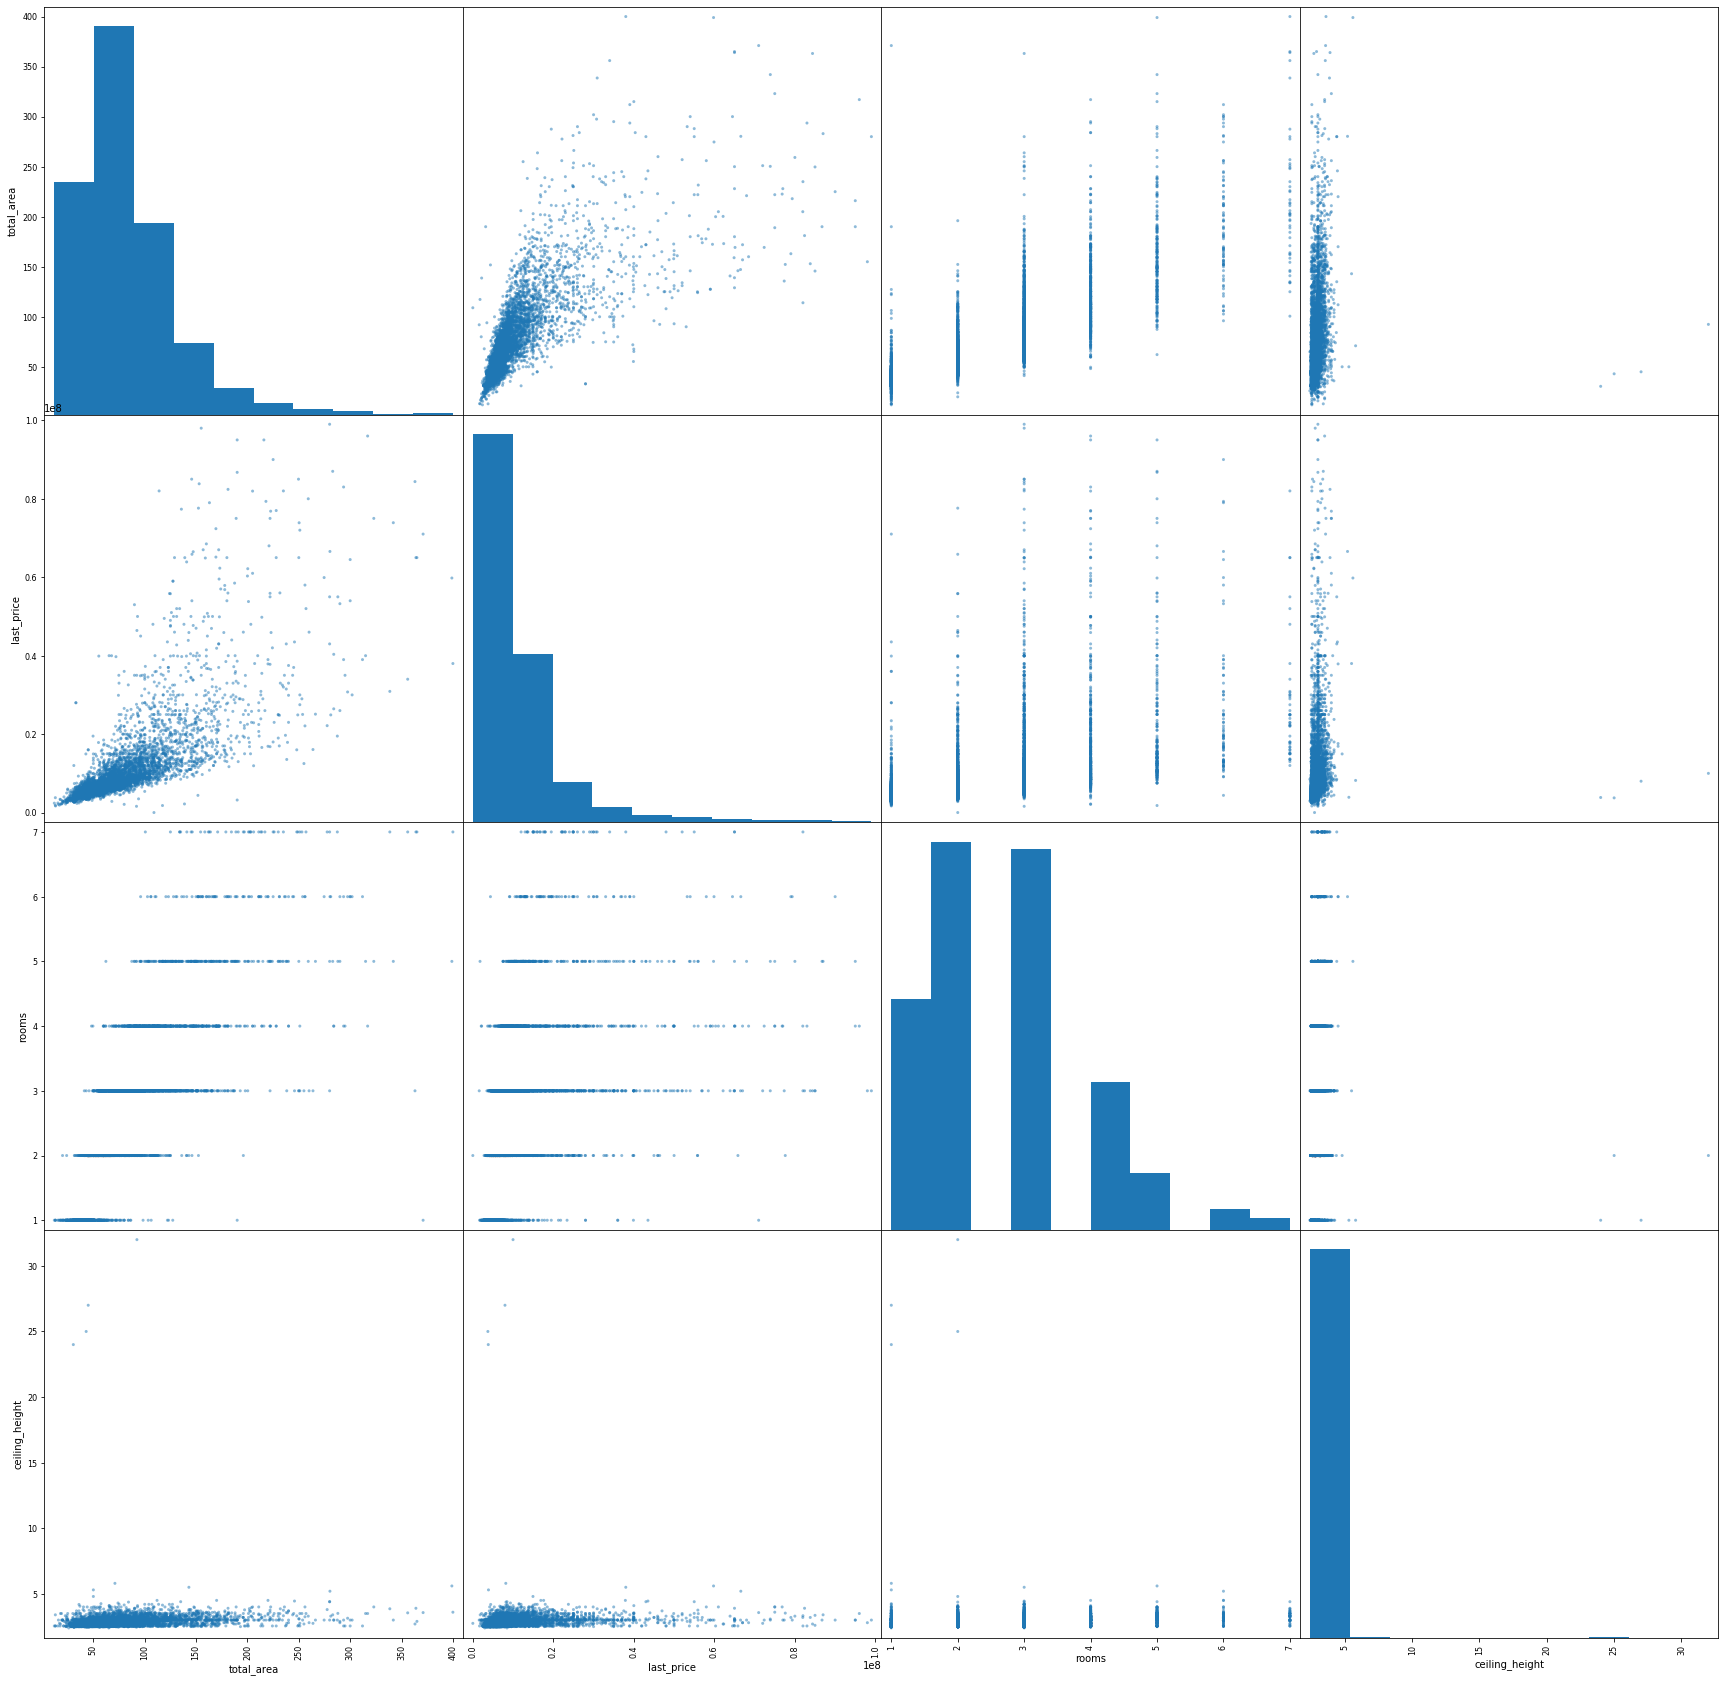

In [335]:
pd.plotting.scatter_matrix(realty_cntr.loc[:, ['total_area', 'last_price', 'rooms', 'ceiling_height']], figsize=(30, 30))

In [336]:
coeff_corr_cntr = pd.DataFrame(index=factors)
for price in price_type:
    corr = []
    for factor in factors:
        corr.append(realty_cntr[price].corr(realty_cntr[factor]))
    coeff_corr_cntr.insert(0, column=price, value=corr)
coeff_corr_cntr

,price_metre,last_price
total_area,0.179802,0.734770
rooms,-0.049536,0.435988
cityCenters_nearest,-0.110964,-0.176466
floor_catеgory,0.028824,0.086983
weekday,0.006925,0.010348
month,0.000187,0.016998
year,0.008795,-0.073757


Альтернативный способ построить матрицу корреляции без цикла for

In [337]:
coeff_corr_cntr = realty_cntr.corr().loc[factors, price_type]
coeff_corr_cntr

,last_price,price_metre
total_area,0.734770,0.179802
rooms,0.435988,-0.049536
cityCenters_nearest,-0.176466,-0.110964
floor_catеgory,0.086983,0.028824
weekday,0.010348,0.006925
month,0.016998,0.000187
year,-0.073757,0.008795


In [338]:
coeff_corr[['last_price_cntr', 'price_metre_ctnr']] = coeff_corr_cntr[['last_price', 'price_metre']]
coeff_corr

,last_price,price_metre,last_price_cntr,price_metre_ctnr
total_area,0.761808,0.255255,0.734770,0.179802
rooms,0.460604,0.014652,0.435988,-0.049536
cityCenters_nearest,-0.302731,-0.362011,-0.176466,-0.110964
floor_catеgory,0.059050,0.045612,0.086983,0.028824
weekday,-0.004912,-0.009385,0.010348,0.006925
month,0.009433,0.001172,0.016998,0.000187
year,-0.054127,0.017518,-0.073757,0.008795


### Шаг 5. Общий вывод

Ожидаемо, наблюдается положительная корреляция полной стоимостью квартиры и 
- общей площадьи квартиры (коэффициент корреляции общий = 0,76, для Центра СПб = 0,73),
- количества комнат (коэффициент корреляции общий = 0,46, для Центра СПб = 0,44).<br>

При этом в Центре можно налюдать небольшую отрицательную корреляцию (-0,05) между количеством комнат и ценой за кв.м. 
Можно предположить, что это связано с наличием коммунальных квартир с большим количеством комнат, в которых при этом низкая цена кв.м. из-за сложностей с выкупом остальной части квартиры.<br>
Для всего фонда заметна отрицательная корреляция между ценой за кв.м и удаленностью от центра (коэффициент корреляции общий = -0,36, для Центра СПб = -0,11).<br>
Заметно, что первые этажи менее привлекательны для покупателей. Отмечается положительная корреляция между высотой этажа и ценой за кв.м. это значит, что с ростом этажа, цена также растет (коэффициент корреляции общий = 0,05, для Центра СПб = 0,03))<br>
<br>

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [X]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. 
- [x]  выполнено задание: "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [X]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [X]  есть общий вывод